In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image # Read and resize image
# Import library and dataset
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import os

(array([  44.,    0.,  287.,    0.,    0., 1066.,   77.,    0.,   28.,
         351.,    0.,  639.,  567.,    0.,  410.,    0.,    0.,  141.,
           0.,   52.]),
 array([ 358. ,  482.5,  607. ,  731.5,  856. ,  980.5, 1105. , 1229.5,
        1354. , 1478.5, 1603. , 1727.5, 1852. , 1976.5, 2101. , 2225.5,
        2350. , 2474.5, 2599. , 2723.5, 2848. ]),
 <a list of 20 Patch objects>)

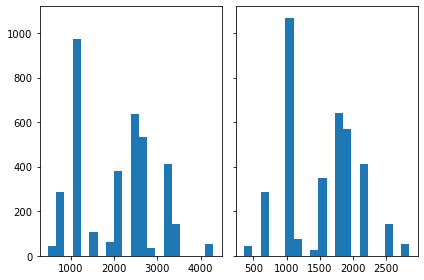

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# https://auth0.com/blog/image-processing-in-python-with-pillow/#:~:text=format%20this%20way.-,Resizing%20Images,Image%20with%20the%20new%20dimensions.

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
x = []
y = []
for dirname, _, filenames in os.walk('/kaggle/input/aptos2019-blindness-detection/train_images/'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        image = Image.open(os.path.join(dirname, filename))
        x = x + [image.size[0]]
        y = y + [image.size[1]]

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
n_bins = 20
# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

## Pre-processing

### Resize images and collecting diagnosis

In [28]:
img_rows, img_cols = 56, 56 # number of pixels 
train_data = pd.read_csv('/kaggle/input/aptos2019-blindness-detection/train.csv')
train_images = []
train_diagnosis = []
for dirname, _, filenames in os.walk('/kaggle/input/aptos2019-blindness-detection/train_images/'):
    for filename in filenames:
        image = Image.open(os.path.join(dirname, filename))
        new_image = image.resize((img_rows, img_cols))
        new_image.save('train_'+filename)
        diagnosis = train_data.loc[train_data['id_code']+'.png' == filename,'diagnosis']
        train_images = train_images + [new_image]
        train_diagnosis = train_diagnosis + [diagnosis]

KeyboardInterrupt: 

In [29]:
import tensorflow as tf # tensorflow 2.0
from keras.datasets import mnist
import numpy as np
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)
num_classes = 10 # 10 digits

In [39]:
len(train_images)

625

In [45]:
import keras
train_diagnosis = keras.utils.to_categorical(np.array(train_diagnosis), 5)

In [46]:
train_diagnosis[0]

1091    3
Name: diagnosis, dtype: int64

In [ ]:
model = Sequential()#add model layers
model.add(Conv2D(32, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
# add second convolutional layer with 20 filters
model.add(Conv2D(64, (5, 5), activation='relu'))
    
# add 2D pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
    
# flatten data
model.add(Flatten())
    
# add a dense all-to-all relu layer
model.add(Dense(1024, activation='relu'))
    
# apply dropout with rate 0.5
model.add(Dropout(0.5))
    
# soft-max layer
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
model.fit(train_images, train_diagnosis, validation_data=(test_images, test_diagnosis), epochs=3)

In [ ]:
# evaluate the model
score = model.evaluate(test_images, test_diagnosis, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1